In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/MandavaNavya/Geakminds_task1/main/Task2.csv"
ts = pd.read_csv(url)

In [4]:
ts.head()

,Date,Value
0,2019-05-06T00:00:00.000+0000,4
1,2019-05-07T00:00:00.000+0000,0
2,2019-05-08T00:00:00.000+0000,7
3,2019-05-09T00:00:00.000+0000,1
4,2019-05-10T00:00:00.000+0000,0


In [7]:
  ts['Date'] = pd.to_datetime(ts['Date'])
  ts.head()

,Date,Value
0,2019-05-06 00:00:00+00:00,4
1,2019-05-07 00:00:00+00:00,0
2,2019-05-08 00:00:00+00:00,7
3,2019-05-09 00:00:00+00:00,1
4,2019-05-10 00:00:00+00:00,0


In [8]:
ts.set_index('Date', inplace = True)

In [9]:
ts.head()

,Value
Date,
2019-05-06 00:00:00+00:00,4
2019-05-07 00:00:00+00:00,0
2019-05-08 00:00:00+00:00,7
2019-05-09 00:00:00+00:00,1
2019-05-10 00:00:00+00:00,0


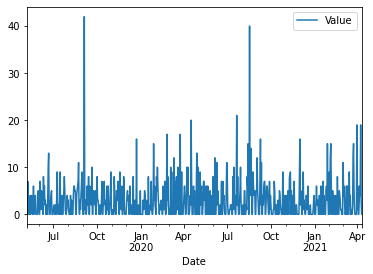

In [10]:
# visualize the data 

ts.plot()

In [15]:
"""testing for the stationary"""
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ts['Value'])

In [16]:
def adfuller_test(value):
  result = adfuller(value)
  labels = ['ADF Test Statistics', 'p-value', '#Lags Used', 'Number of Obeservations Used']
  for value , label in zip(result, labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("strong evidence")
  else:
    print("week evidence")


In [17]:
adfuller_test(ts['Value'])

ADF Test Statistics : -4.309756828945186
p-value : 0.000427244552897515
#Lags Used : 20
Number of Obeservations Used : 685
strong evidence


In [22]:
"""Differencing """

ts["seasonal_first_Diffrenrence"] = ts['Value'] - ts['Value'].shift(12)


In [21]:
ts.head(14)

,Value,values first Diffrenrence,seasonal first Diffrenrence
Date,,,
2019-05-06 00:00:00+00:00,4,NaN,NaN
2019-05-07 00:00:00+00:00,0,NaN,NaN
2019-05-08 00:00:00+00:00,7,NaN,NaN
2019-05-09 00:00:00+00:00,1,NaN,NaN
2019-05-10 00:00:00+00:00,0,NaN,NaN
2019-05-11 00:00:00+00:00,0,NaN,NaN
2019-05-12 00:00:00+00:00,0,NaN,NaN
2019-05-13 00:00:00+00:00,4,NaN,NaN
2019-05-14 00:00:00+00:00,0,NaN,NaN


In [23]:
adfuller_test(ts['seasonal_first_Diffrenrence'].dropna())

ADF Test Statistics : -6.046078557222308
p-value : 1.31091272907173e-07
#Lags Used : 20
Number of Obeservations Used : 673
strong evidence


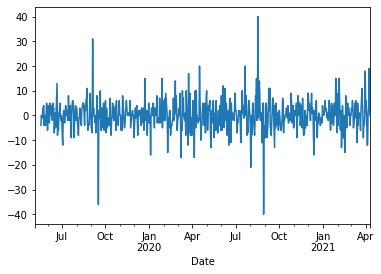

In [25]:
ts["seasonal_first_Diffrenrence"].plot()

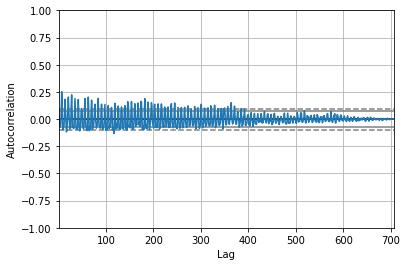

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts['Value'])
plt.show()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


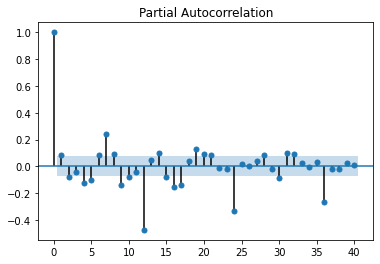

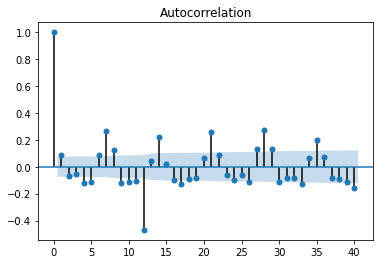

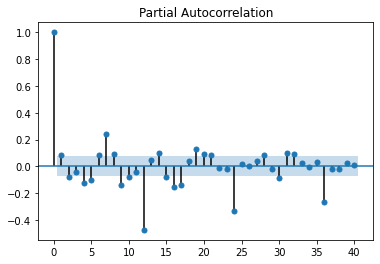

In [33]:
plot_acf(ts['seasonal_first_Diffrenrence'].iloc[13:], lags=40)
plot_pacf(ts['seasonal_first_Diffrenrence'].iloc[13:], lags=40)

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model = ARIMA(ts['Value'], order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


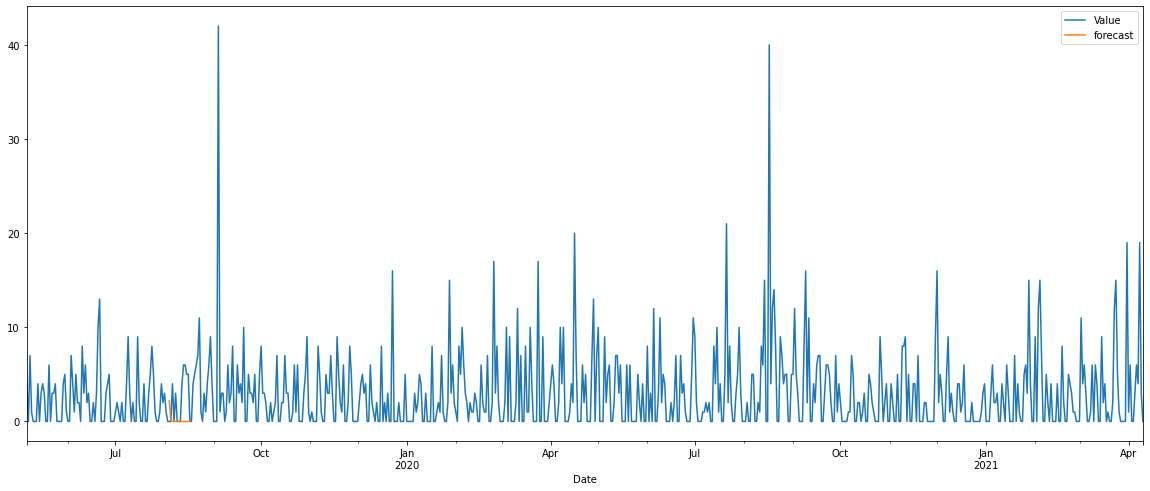

In [63]:
ts['forecast']=model_fit.predict(start= 90, end= 103, dynamic=True)
ts[['Value', 'forecast']].plot(figsize=(20,8))

In [44]:
import statsmodels.api as sm

In [45]:
model = sm.tsa.statespace.SARIMAX(ts['Value'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


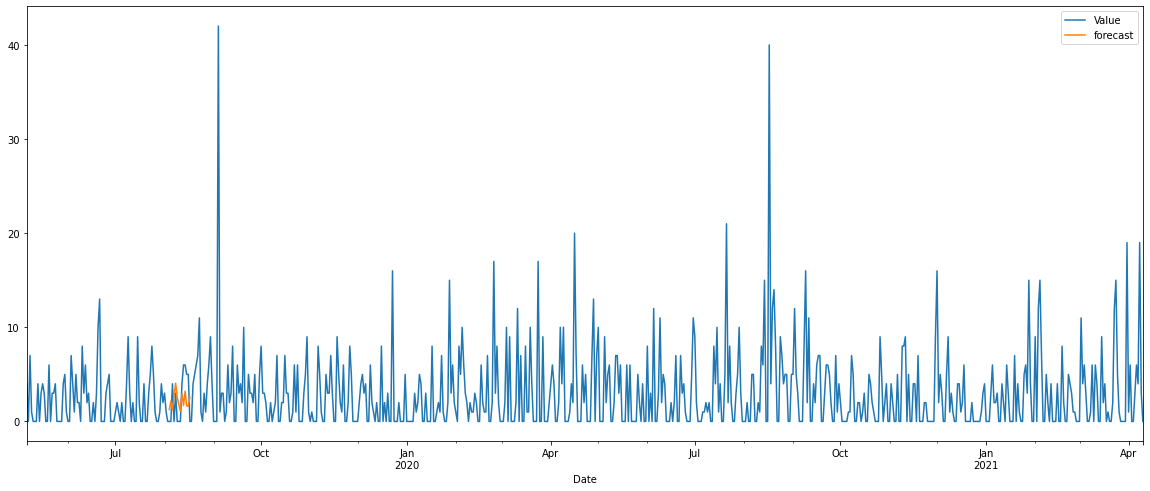

In [64]:
ts['forecast'] = result.predict(start=90, end=103, dynamic= True)
ts[['Value', 'forecast']].plot(figsize=(20,8))

In [51]:
from pandas.tseries.offsets import DateOffset
future_dates = [ts.index[-1]+ DateOffset(month=x)for x in range(0,12)]


In [54]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=ts.columns)
future_dates_df.tail()

,Value,values first Diffrenrence,seasonal first Diffrenrence,seasonal_first_Diffrenrence,forcast,forecast
2021-07-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN


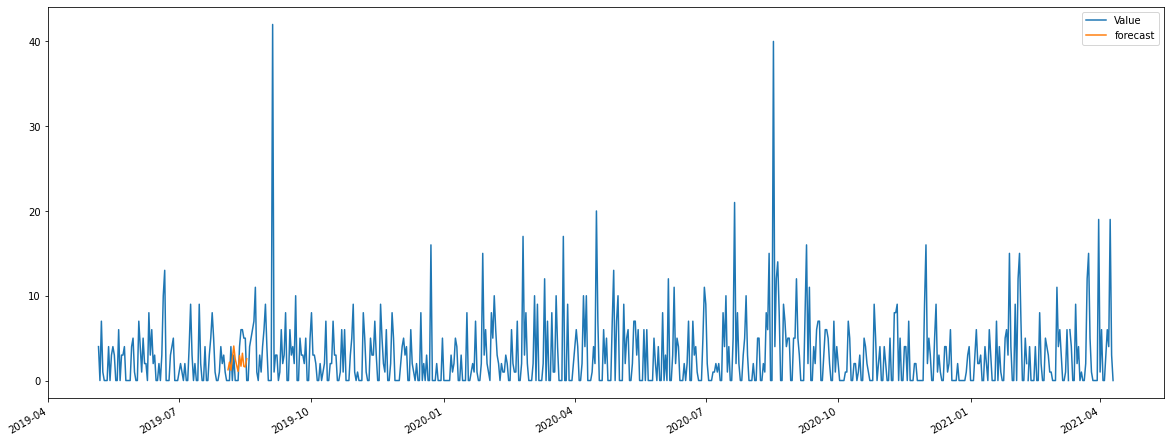

In [62]:
future_df = pd.concat([ts, future_dates_df ])
future_df[['Value', 'forecast']].plot(figsize=(20,8))